In [26]:
# Hallo World اما بعد
# this module is the one for preprocessing 
# we start with reading the data from the Machine you working on

In [27]:
# the imports
import os
import matplotlib.pyplot as plt
import cv2
from deslant_img import deslant_img
from wand.image import Image
from wand.display import display
from matplotlib import cm
os.environ["MAGIK_HOME"] = "C:\Program Files\ImageMagick-7.1.1-Q16-HDRI"
import numpy as np

In [28]:


def Read_IAM(txt_path,data_location):
    """
    this function reads the IAM data sets through its Text File and outputs the paths to the images files and other information which are numebr of
    component, gray scale level for binarization , location of bounding boxes in the image data set, state of it image in terms of segmentation 
    (ok: line is correctly segmented ,err: segmentation of line has one or more errors) and its true label 
    the order of the returned objects are as follows: txt_path , txt_state , txt_label ,txt_graylevel, txt_number_of_components,txt_bounding_box

    txt_path : the txt_path to the text file in IAM line data set 
    data_location : the location of the data in your machine for example "D:\Academics\DS\Project\data\Data\IAM\A The og\the Try"
    """
    with open(txt_path,"r") as file:
        txt = file.read()
    txt = txt.splitlines()
    txt_1 = [i for i in txt if not i.startswith("#")]
    txt_path=[]
    txt_state=[]
    txt_label=[]
    txt_graylevel=[]
    txt_number_of_components=[]
    txt_bounding_box=[]
    for i in txt_1:
        txt_path.append(i.split()[0])
        txt_label.append(i.split()[-1])
        txt_number_of_components.append(i.split()[3])
        txt_state.append(i.split()[1])
        txt_graylevel.append(i.split()[2])
        txt_bounding_box.append(i.split()[4:8])
    path_t =[]
    for i in range(len(txt_path)):
        path_t.append(r""+os.path.join(r""+data_location,txt_path[i].split("-")[0],txt_path[i].split("-")[0]+"-"+txt_path[i].split("-")[1],txt_path[i]+".png"))
        
    return path_t , txt_state , txt_label ,txt_graylevel, txt_number_of_components,txt_bounding_box
    
    
    
    


In [29]:
# in the next line we call variables for the read method 
# note this required after every
# Here is how to use the path output form the function
# just call it with the two file locations one for the text location and the other for the data location (where did u unzip it)
# never FORGET TO PUT THE r IN FORNT TO THE PATH otherwise it will get u and error
# very important note this is where to write the data as well
# so like this

In [30]:
path_IAM,state_IAM,label_IAM,grayleve_IAM,numofcompo_IAM,box_IAM= Read_IAM(r"D:\Academics\DS\Project\possible data\kiss my fat man\lines.txt",r"D:\Academics\DS\Project\data\Data\IAM\A The og\the Try")

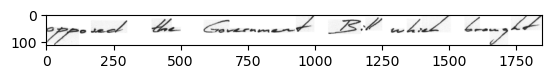

In [31]:
# then let's see if it works
img = cv2.imread(path_IAM[17])

#print(img)
plt.imshow(img)

In [32]:
# not to all who uses this code this work if you download the data form the official website (the link in the Documentation) because it uses
# the location of files after unzipping the data
def Rimes_read(txt_path_1, txt_path_2, txt_path_3, data_location):
    """
    this function reads the IAM data sets through its Text File and outputs the paths to the images files and other information which are path and 
    labels

    note in Rimes data sets there is 3 text files

    txt_path_1 : the txt_path to the text file in IAM line data set
    txt_path_2 : the txt_path to the text file in IAM line data set
    txt_path_3 : the txt_path to the text file in IAM line data set
    data_location : the location of the data in your machine for example "D:\Academics\DS\Project\data\Data\koimes"


    """
    with open (r""+txt_path_1,"r") as file:
        text = file.read()

    text_1=text.splitlines()

    with open (r""+txt_path_2,"r") as file:
        text2 = file.read()

    text2_2=text2.splitlines()

    with open (r""+txt_path_3,"r") as file:
        text3 = file.read()    
    
    text3_3=text3.splitlines()

    text_1.extend(text2_2)

    text_1.extend(text3_3)

    paths = []
    trans = []

    the_extracte_name = "RIMES-2011-Lines"
    the_image_file = "Images"
    the_transcript_file = "Transcriptions"
    

    for i in range(len(text_1)):
        jojo= r""+os.path.join(r""+data_location,r""+the_extracte_name,r""+the_image_file,text_1[i]+".jpg")
        paths.append(jojo)
    

    for i in range(len(text_1)):
        jojo1= r""+os.path.join(r""+data_location,r""+the_extracte_name,r""+the_transcript_file,text_1[i]+".txt")
        with open(jojo1,"r") as file:
            bobo = file.read()
        trans.append(bobo)
    
    return paths , trans


In [33]:
# Here is how to use the path output form the function

# just call it with the inputs require (in the method Documentation) file locations one for the text location and the other --
# for the data location (where did u unzip it)

# never FORGET TO PUT THE FKEN r IN FORNT TO THE PATH otherwise it will get u and error
# note it may take up to a minute or so
# the same note form the IAM data set reader this is the same path that you will right into

paths_rimes, trans_rimes= Rimes_read(r"D:\Academics\DS\Project\data\Data\koimes\RIMES-2011-Lines\Sets\TestLines.txt",r"D:\Academics\DS\Project\data\Data\koimes\RIMES-2011-Lines\Sets\TrainLines.txt",r"D:\Academics\DS\Project\data\Data\koimes\RIMES-2011-Lines\Sets\ValidationLines.txt",r"D:\Academics\DS\Project\data\Data\koimes")

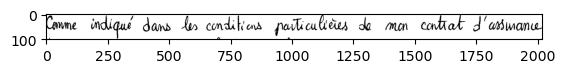

In [34]:
# then let's see if it works
koko=cv2.imread(paths_rimes[0])
plt.imshow(koko)

In [35]:
trans_rimes[0]

"Comme indiqué dans les conditions particulières de mon contrat d'assurance"

In [36]:
# this method is used to find the max dimensions of our datasets
import cv2
import os
#this function loop on the file of images to det the max dimensions on it
def get_max_dimensions(paths):
	#intial the height and width
    max_height = 0
    max_width = 0
    for path in paths:
        if path.endswith(".jpg") or path.endswith(".png"):
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale
			#get the dimentions of the image to save in the variables height and weight
            height, width = img.shape
            max_height = max(max_height, height)
            max_width = max(max_width, width)
    return max_height, max_width

In [37]:

def invert_1(path):
    img = cv2.imread(path)
    img = cv2.bitwise_not(img)
    cv2.imwrite(path,img)

In [38]:
def binarization_2(path):
    
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_bin = cv2.threshold(img_gray,0,255,cv2.THRESH_OTSU)[1]
    
    cv2.imwrite(r""+path,img_bin)

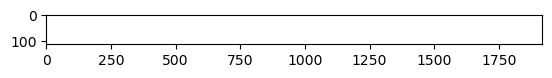

In [39]:
invert_1(path_IAM[1])
kolo = cv2.imread(path_IAM[1])
plt.imshow(kolo)

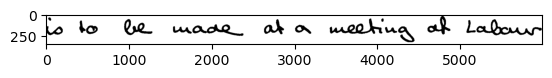

In [40]:
binarization_2(path_IAM[2])
kolo = cv2.imread(path_IAM[2],cv2.IMREAD_GRAYSCALE)
plt.imshow(kolo,cmap="gray")

In [41]:
#Noise Removal
def noise_removal_3(line_image_path):
    image = cv2.imread(line_image_path)
    kernel = np.ones((1, 1), np.uint8)
    no_nois_image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    no_nois_image = cv2.erode(no_nois_image, kernel, iterations=1)
    no_nois_image = cv2.morphologyEx(no_nois_image, cv2.MORPH_CLOSE, kernel)
    no_nois_image = cv2.medianBlur(no_nois_image, 3)  
    cv2.imwrite(line_image_path, no_nois_image)


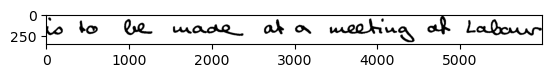

In [42]:
noise_removal_3(path_IAM[2])
kolo = cv2.imread(path_IAM[2],cv2.IMREAD_GRAYSCALE)
plt.imshow(kolo,cmap="gray")

In [43]:
#Dilation and Erosion
def thick_font_4(line_image_path):
    import numpy as np
    image = cv2.imread(line_image_path)
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    dilated_image = cv2.bitwise_not(dilated_image)
    cv2.imwrite(line_image_path, dilated_image)

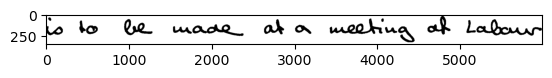

In [44]:
thick_font_4(path_IAM[2])
kolo = cv2.imread(path_IAM[2],cv2.IMREAD_GRAYSCALE)
plt.imshow(kolo,cmap="gray")

In [45]:
def deskew_5(path):
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.medianBlur(img, 3)
    img=Image.from_array(img)
    img.deskew(0.4*img.quantum_range)
    #display(img)
    image = np.array(img)
    cv2.imwrite(path,image)
    return image

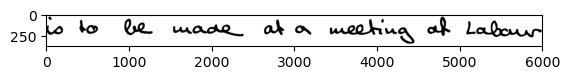

In [46]:
deskew_5(path_IAM[2])
kolo = cv2.imread(path_IAM[2],cv2.IMREAD_GRAYSCALE)
plt.imshow(kolo,cmap="gray")

In [47]:
def deslant_image_6(path):
	#Need to do preprocessing because deslant_img need the image 2D
	img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
	res = deslant_img(img,bg_color=0).img
	cv2.imwrite(path,res)
	return(res)
	

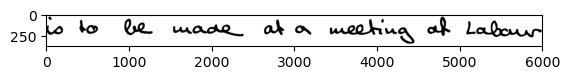

In [48]:
deslant_image_6(path_IAM[2])
kolo = cv2.imread(path_IAM[2],cv2.IMREAD_GRAYSCALE)
plt.imshow(kolo,cmap="gray")

In [49]:
#this function get the path of image and the max dimentions which came from get_max_dimensions and we put the defualt color of padding white
def rescaling_7(path,max_height,max_width,color=(255, 255, 255)):
	#apply preprocess_line_image()function to make the image 2D
	img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

	# Get the height and width of the current image
	img_height, img_width = img.shape
	# Calculate the resize ratio based on max_height divided by the current image's height
	ratio = max_height / img_height
	# Resize the image
	resized_img = img

	# Calculate padding values based on the resized image's dimensions
	pad_height = max(0, max_height - resized_img.shape[0])
	pad_width = max(0, max_width - resized_img.shape[1])

	# Add padding to the image only if it's larger than the original
	if pad_height > 0 or pad_width > 0:
		padded_img = cv2.copyMakeBorder(resized_img, 0, pad_height, 0, pad_width, cv2.BORDER_CONSTANT, value=color)
	else:
		# If no padding is needed, use the resized image directly
		padded_img = resized_img

	# Save the resized and padded image
	cv2.imwrite(path, padded_img)

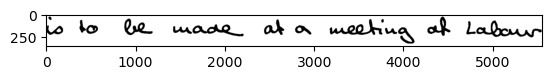

In [50]:
rescaling_7(path_IAM[2],350,3000,(0,0,0))
kolo = cv2.imread(path_IAM[2],cv2.IMREAD_GRAYSCALE)
plt.imshow(kolo,cmap="gray")

In [51]:
def invert_1_s(img):
    img = cv2.bitwise_not(img)
    return img

def binarization_2_s(img):
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_bin = cv2.threshold(img_gray,0,255,cv2.THRESH_OTSU)[1]
    return img_bin

def noise_removal_3_s(img):
    kernel = np.ones((1, 1), np.uint8)
    no_nois_image = cv2.dilate(img, kernel, iterations=1)
	#kernel = np.ones((1, 1), np.uint8)
    no_nois_image = cv2.erode(no_nois_image, kernel, iterations=1)
    no_nois_image = cv2.morphologyEx(no_nois_image, cv2.MORPH_CLOSE, kernel)
    no_nois_image = cv2.medianBlur(no_nois_image, 3)  
    return(no_nois_image)

#Dilation and Erosion
def thick_font_4_s(img):
    img = cv2.bitwise_not(img)
    kernel = np.ones((2,2),np.uint8)
    dilated_image = cv2.dilate(img, kernel, iterations=1)
    dilated_image = cv2.bitwise_not(dilated_image)
    return(dilated_image)

def deskew_5_s(img):
    #img = cv2.medianBlur(img, 3)
    img=Image.from_array(img)
    img.deskew(0.4*img.quantum_range)
    #display(img)
    image = np.array(img)
    image = np.squeeze(image)
    return image

def deslant_image_6_s(img):
	#Need to do preprocessing because deslant_img need the image 2D
	res = deslant_img(img,bg_color=255).img
	return res 


def rescaling_7_s(img,max_height,max_width,color=(255, 255, 255)):
	#apply preprocess_line_image()function to make the image 2D
	# Get the height and width of the current image
	img_height, img_width = img.shape
	# Calculate the resize ratio based on max_height divided by the current image's height
	ratio = max_height / img_height
	# Resize the image
	resized_img = img
	# Calculate padding values based on the resized image's dimensions
	pad_height = max(0, max_height - resized_img.shape[0])
	pad_width = max(0, max_width - resized_img.shape[1])

	# Add padding to the image only if it's larger than the original
	if pad_height > 0 or pad_width > 0:
		padded_img = cv2.copyMakeBorder(resized_img, pad_height,0, 0, pad_width, cv2.BORDER_CONSTANT, value=color)
	else:
		# If no padding is needed, use the resized image directly
		padded_img = resized_img
    
	imggg=padded_img

	return imggg
    
    



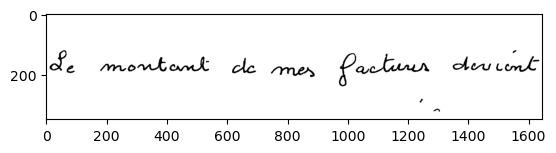

In [52]:
path_shita=r"D:\Academics\DS\Project\data\Data\koimes\RIMES-2011-Lines\Images\eval2011-24_000003.jpg"
path_shita_2=r"D:\Academics\DS\Project\data\Data\koimes\RIMES-2011-Lines\Images\eval2011-36_000003.jpg"
path_shita_3=r"D:\Academics\DS\Project\data\Data\koimes\RIMES-2011-Lines\Images\eval2011-36_000001.jpg"
path_shita_4=r"D:\Academics\DS\Project\data\Data\koimes\RIMES-2011-Lines\Images\eval2011-35_000001.jpg"
img=cv2.imread(path_shita_4)
plt.imshow(img)

#img=invert_1_s(img)

img = binarization_2_s(img)
plt.imshow(img,cmap="gray")

img = noise_removal_3_s(img)
plt.imshow(img,cmap="gray")

img = thick_font_4_s(img)
plt.imshow(img,cmap="gray")

img = deskew_5_s(img)
plt.imshow(img,cmap="gray")

img = deslant_image_6_s(img)
plt.imshow(img,cmap="gray")




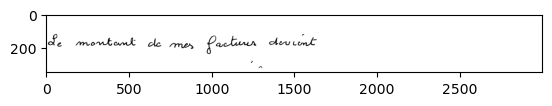

In [53]:
img = rescaling_7_s(img,300,3000,color=(255, 255, 255))

plt.imshow(img,cmap="gray")

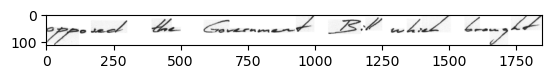

In [54]:
img=cv2.imread(path_IAM[17])
plt.imshow(img)

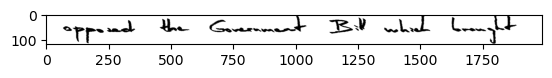

In [55]:


#img=invert_1_s(img)

img = binarization_2_s(img)
plt.imshow(img,cmap="gray")

img = noise_removal_3_s(img)
plt.imshow(img,cmap="gray")

img = thick_font_4_s(img)
plt.imshow(img,cmap="gray")

img = deskew_5_s(img)
plt.imshow(img,cmap="gray")

img = deslant_image_6_s(img)
plt.imshow(img,cmap="gray")



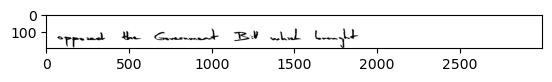

In [56]:
img = rescaling_7_s(img,200,3000,color=(255, 255, 255))
plt.imshow(img,cmap="gray")

In [57]:
# here to try to run the code on a small sample of photos

# first we get the paths for the photos and put them in itrable

# note this a simulation to the entire paths of an data set

paf1=r"D:\Academics\DS\Project\data\Data\IAM\A The og\the Try\a02\a02-000\a02-000-00.png"
paf2=r"D:\Academics\DS\Project\data\Data\IAM\A The og\the Try\a02\a02-000\a02-000-01.png"
paf3=r"D:\Academics\DS\Project\data\Data\IAM\A The og\the Try\a02\a02-000\a02-000-02.png"
paf4=r"D:\Academics\DS\Project\data\Data\IAM\A The og\the Try\a02\a02-000\a02-000-03.png"
paf5=r"D:\Academics\DS\Project\data\Data\IAM\A The og\the Try\a02\a02-000\a02-000-04.png"
paf6=r"D:\Academics\DS\Project\data\Data\IAM\A The og\the Try\a02\a02-000\a02-000-05.png"
paf7=r"D:\Academics\DS\Project\data\Data\IAM\A The og\the Try\a02\a02-000\a02-000-06.png"
paf8=r"D:\Academics\DS\Project\data\Data\IAM\A The og\the Try\a02\a02-000\a02-000-07.png"
pathss=[paf8,paf7,paf6,paf5,paf4,paf3,paf2,paf1]

# note not all steps will be apparent as some of then are not flowed acordingly (ex the line is straight or there is no noise)

# secand we run to get the maximum width and height

hight,width = get_max_dimensions(pathss)


# then we use simple for loop to iterate through all the images and preprocess them
for i in pathss:
    img = cv2.imread(i)

    

    img = binarization_2_s(img)
    

    img = noise_removal_3_s(img)


    img = thick_font_4_s(img)


    img = deskew_5_s(img)


    img = deslant_image_6_s(img)
    
    # this is only if needed and in this order the number of it (1) indicates something else Be CAREFUL if run first it may lead to errors
    #img=invert_1_s(img)  

    img = rescaling_7_s(img,hight,width,color=(255, 255, 255))
    
    cv2.imwrite(i,img)
    


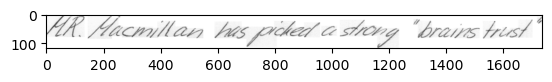

In [58]:
# the old image vs the new one we will display a few of them

img_1 = cv2.imread(r"D:\Academics\DS\Project\possible data\a02-000\a02-000-00.png")
plt.imshow(img_1)


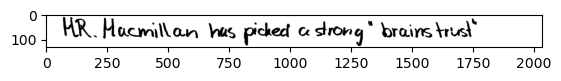

In [59]:
img_1_preprocessed = cv2.imread(paf1)
plt.imshow(img_1_preprocessed)

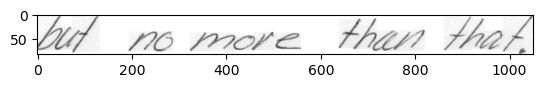

In [60]:
img_7 = cv2.imread(r"D:\Academics\DS\Project\possible data\a02-000\a02-000-07.png")
plt.imshow(img_7)

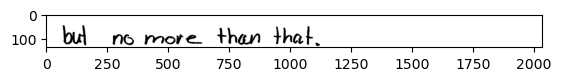

In [61]:
img_8_preprocessed = cv2.imread(paf8)
plt.imshow(img_8_preprocessed)

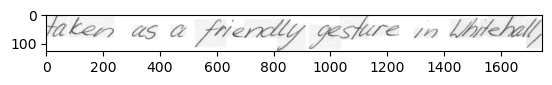

In [62]:
img_6 = cv2.imread(r"D:\Academics\DS\Project\possible data\a02-000\a02-000-06.png")
plt.imshow(img_6)

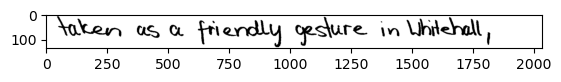

In [63]:
img_7_preprocessed = cv2.imread(paf7)
plt.imshow(img_7_preprocessed)

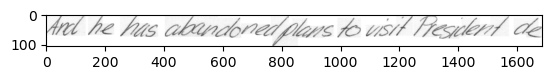

In [64]:
img_2 = cv2.imread(r"D:\Academics\DS\Project\possible data\a02-000\a02-000-02.png")
plt.imshow(img_2)

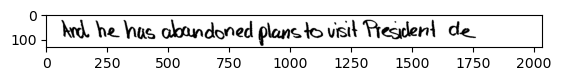

In [65]:
img_3_preprocessed = cv2.imread(paf3)
plt.imshow(img_3_preprocessed)

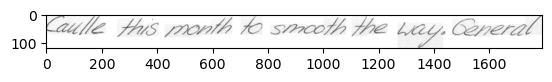

In [78]:
# now let's take setp by step view
imggg = cv2.imread(r"D:\Academics\DS\Project\possible data\a02-000\a02-000-03.png") 
plt.imshow(imggg)

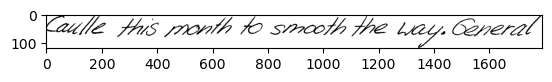

In [79]:
# first step
imggg = binarization_2_s(imggg)
plt.imshow(imggg,cmap="gray")

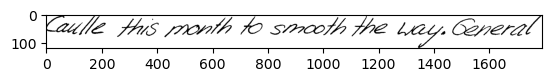

In [80]:
# secand step
# note in this image there is no noise
imggg = noise_removal_3_s(imggg)
plt.imshow(imggg,cmap="gray")

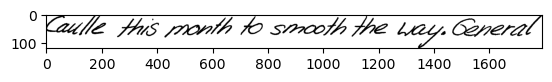

In [81]:
# third step
imggg = thick_font_4_s(imggg)
plt.imshow(imggg,cmap="gray")

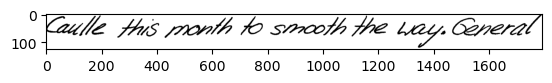

In [82]:
# forth step
# note here the line is straight so no effect 
imggg = deskew_5_s(imggg)
plt.imshow(imggg,cmap="gray")

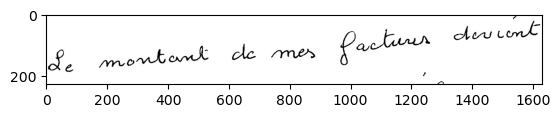

In [83]:
# the same step but with not so straight line
imggg_6 = cv2.imread(r"D:\Academics\DS\Project\data\Data\koimes\RIMES-2011-Lines\Images\eval2011-35_000001.jpg") 
plt.imshow(imggg_6)

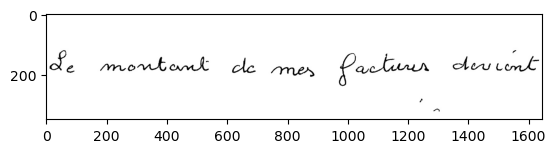

In [84]:
# deskewing
imggg_6 = deskew_5_s(imggg_6)
plt.imshow(imggg_6,cmap="gray")

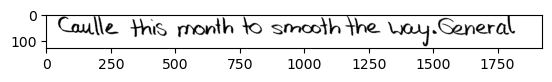

In [86]:
# step five deslant
imggg = deslant_image_6_s(imggg)
plt.imshow(imggg,cmap="gray")

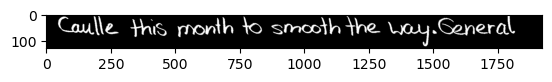

In [87]:
# step six invert 
imggg = invert_1_s(imggg)
plt.imshow(imggg,cmap="gray")


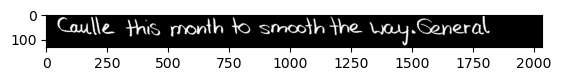

In [89]:
# last step rescaling 
imggg = rescaling_7_s(imggg,hight,width,(0,0,0))
plt.imshow(imggg,cmap="gray")